<a href="https://colab.research.google.com/github/anshisharma07/git_demo/blob/master/DSC_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
data = pd.read_csv('/content/creditcard.csv')

# Preprocessing
data.fillna(0, inplace=True)  # Handle missing values
X = data.drop('Class', axis=1)  # Features - Changed 'is_fraud' to 'Class'
y = data['Class']  # Target variable- Changed 'is_fraud' to 'Class'

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56829    35]
 [   43    55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.56      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.78      0.79     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
141197,84168.0,-0.792114,1.672988,0.769293,2.656285,0.402788,0.212538,1.084828,0.200131,-2.312672,...,0.102239,0.063204,-0.216782,-0.418360,0.639078,0.400843,-0.103168,0.013233,96.62,0
281873,170484.0,1.988225,0.050397,-0.932925,0.567339,-0.372471,-1.768827,0.328499,-0.485709,0.410757,...,0.323179,1.124534,0.099096,0.931545,0.159873,-0.163862,-0.011444,-0.047117,9.49,0
225187,144141.0,2.235673,-1.430858,-0.776499,-1.641758,-1.250395,-0.362753,-1.231835,-0.090843,-1.417634,...,-0.109645,0.194831,0.192490,-0.399577,-0.239327,-0.174917,0.021894,-0.057453,25.90,0
144398,86090.0,-1.075626,1.407163,1.181831,-0.558896,0.080315,-1.046806,0.895687,-0.308740,-0.030788,...,-0.037756,-0.304110,0.010808,0.374653,-0.435578,-0.092830,-0.362528,0.205167,1.33,0
137226,82072.0,1.069310,-0.517715,1.197995,0.151763,-1.080692,0.291686,-0.800389,0.320578,0.928553,...,-0.128234,-0.159960,0.103454,0.298876,-0.002665,0.940125,-0.024879,0.006472,30.00,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91651.250000,-0.094389,-0.039467,0.013767,-0.001438,-0.024713,0.069500,-0.064027,-0.118614,0.062648,...,-0.045467,0.002318,-0.011096,-0.026661,0.033541,0.001707,0.030440,-0.029743,0.025687,89.444756
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
print(X)
print(y)

            Time        V1        V2        V3        V4        V5        V6  \
141197   84168.0 -0.792114  1.672988  0.769293  2.656285  0.402788  0.212538   
281873  170484.0  1.988225  0.050397 -0.932925  0.567339 -0.372471 -1.768827   
225187  144141.0  2.235673 -1.430858 -0.776499 -1.641758 -1.250395 -0.362753   
144398   86090.0 -1.075626  1.407163  1.181831 -0.558896  0.080315 -1.046806   
137226   82072.0  1.069310 -0.517715  1.197995  0.151763 -1.080692  0.291686   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [ ]:
model = LogisticRegression()
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9364675984752223


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.934010152284264


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')
# first 5 rows of the dataset
credit_card_data.head()
credit_card_data.tail()
# dataset informations
credit_card_data.info()
# checking the number of missing values in each column
credit_card_data.isnull().sum()
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
print(legit.shape)
print(fraud.shape)
# statistical measures of the data
legit.Amount.describe()
fraud.Amount.describe()
# compare the values for both transactions
credit_card_data.groupby('Class').mean()
legit_sample = legit.sample(n=492)
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()
new_dataset.tail()
new_dataset['Class'].value_counts()
new_dataset.groupby('Class').mean()
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
print(X)
print(y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
model = LogisticRegression()
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

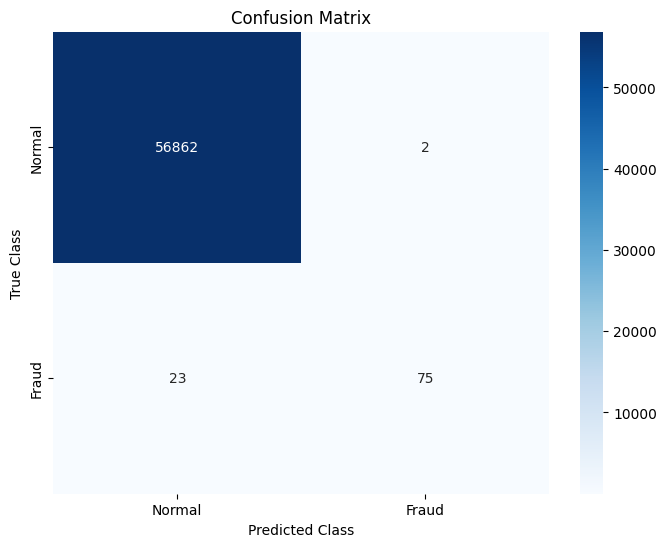

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
data = pd.read_csv('creditcard.csv')
print(data.head())
X = data.drop(['Class'], axis=1)  # Features
Y = data['Class']  # Target variable
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

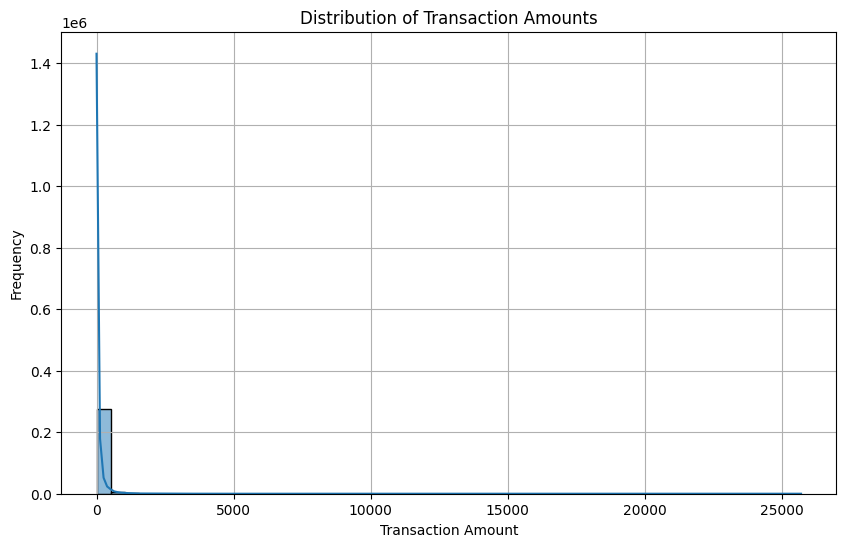

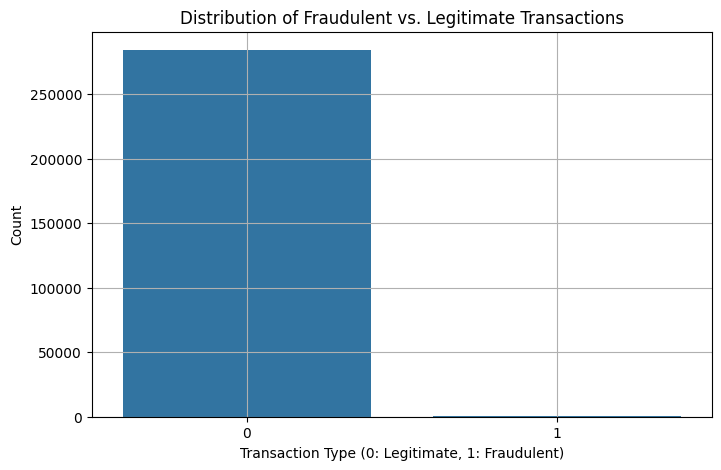

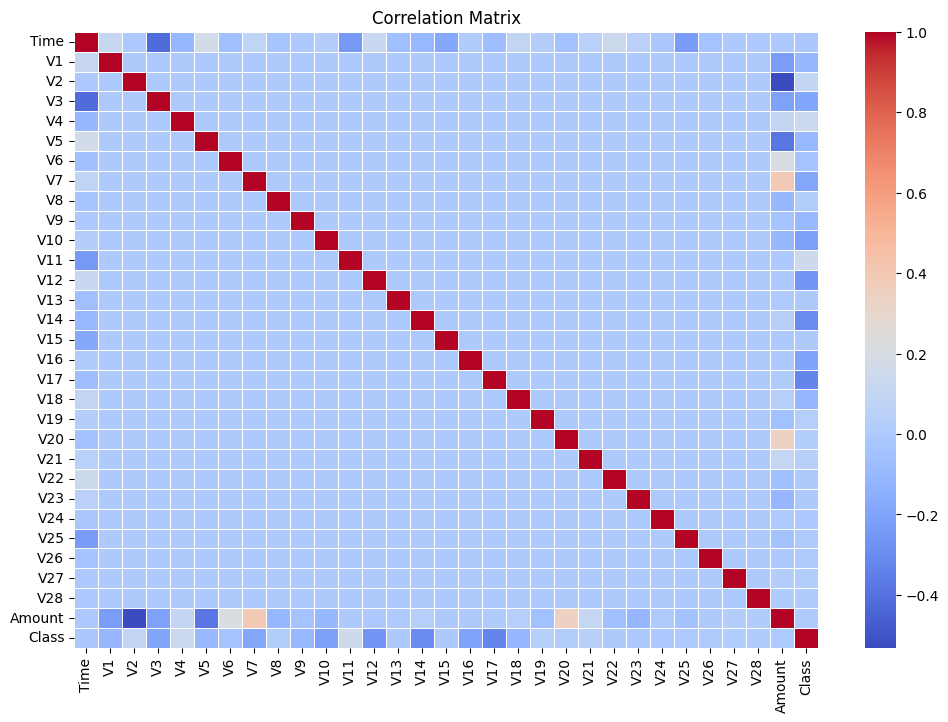


Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/creditcard.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display the shape of the dataset
print("\nShape of the dataset:")
print(data.shape)

# Display summary statistics
print("\nSummary statistics:")
summary_stats = data.describe()
print(summary_stats)

# Count of fraudulent vs. legitimate transactions
class_counts = data['Class'].value_counts()
print("\nCount of fraudulent vs. legitimate transactions:")
print(class_counts)

# Visualize the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Visualize the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraudulent vs. Legitimate Transactions')
plt.xlabel('Transaction Type (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.grid()
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Display the number of missing values in each column
print("\nMissing values in each column:")
print(data.isnull().sum())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

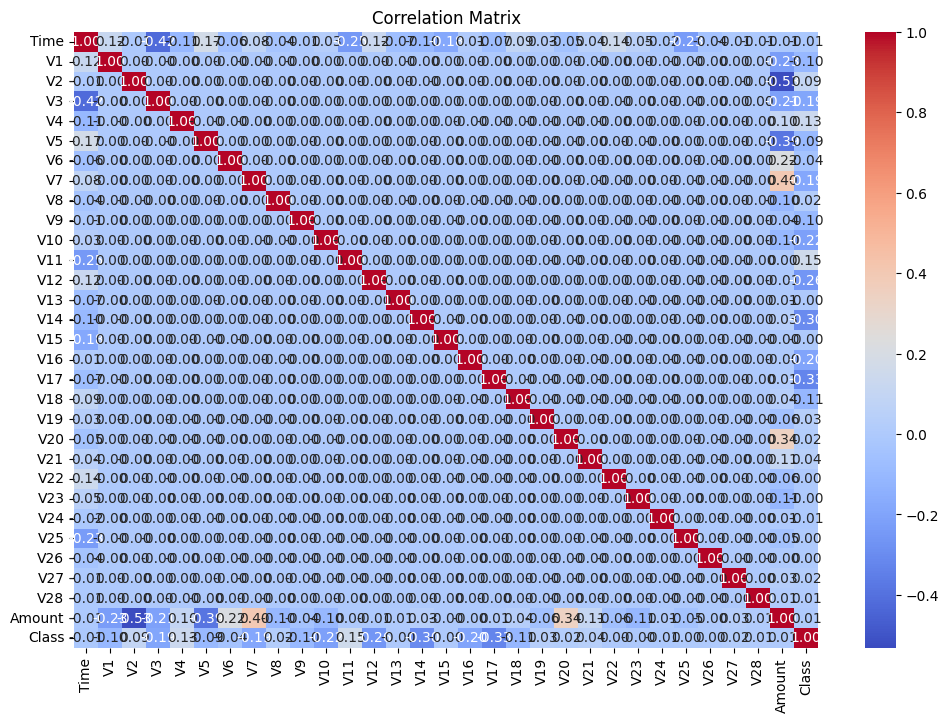

95% Confidence interval for mean legitimate transaction amount: (np.float64(87.37168997704325), np.float64(89.2103548675833))


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
data = pd.read_csv('/creditcard.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Descriptive statistics
print(data.describe())

# Hypothesis Testing: Check if the mean transaction amount differs between fraudulent and legitimate transactions
legit_amount = data[data['Class'] == 0]['Amount']
fraud_amount = data[data['Class'] == 1]['Amount']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(legit_amount, fraud_amount)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in transaction amounts.")
else:
    print("Fail to reject the null hypothesis: No significant difference in transaction amounts.")

# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Confidence Interval for the mean transaction amount of legitimate transactions
mean_legit = legit_amount.mean()
std_legit = legit_amount.std()
n_legit = legit_amount.count()
confidence_level = 0.95
degrees_freedom = n_legit - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_legit, std_legit/np.sqrt(n_legit))
print(f'95% Confidence interval for mean legitimate transaction amount: {confidence_interval}')

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213

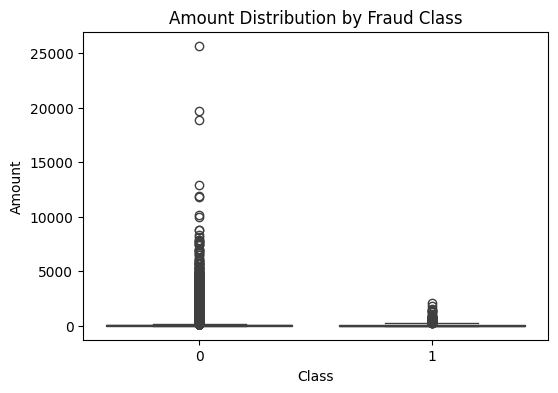

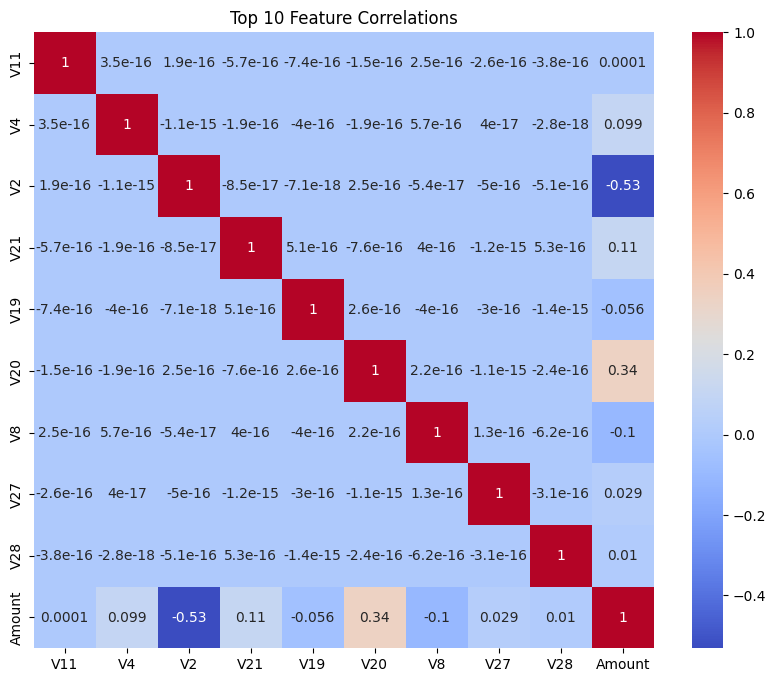

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency, pearsonr

# Load dataset
df = pd.read_csv("/creditcard.csv")

# Basic summary
print(df['Class'].value_counts(normalize=True))
print(df.describe())

# Separate fraud and non-fraud
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# ------------------------------
# 1. T-test for 'Amount'
# ------------------------------
t_stat, p_value = ttest_ind(fraud['Amount'], non_fraud['Amount'], equal_var=False)
print(f"\nT-test on Amount:\nT-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# ------------------------------
# 2. Correlation with target
# ------------------------------
correlations = {}
for col in df.columns:
    if col != 'Class':
        corr, _ = pearsonr(df[col], df['Class'])
        correlations[col] = corr

# Convert to DataFrame
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['CorrelationWithFraud'])
corr_df = corr_df.sort_values(by='CorrelationWithFraud', ascending=False)
print("\nTop features correlated with fraud:\n", corr_df.head())

# ------------------------------
# 3. Chi-Square Test (on binned Amount)
# ------------------------------
df['AmountBin'] = pd.qcut(df['Amount'], q=4, duplicates='drop')
contingency = pd.crosstab(df['AmountBin'], df['Class'])
chi2, chi_p, _, _ = chi2_contingency(contingency)
print(f"\nChi-Square test on binned Amount vs Fraud:\nChi2 Stat: {chi2:.4f}, P-value: {chi_p:.4f}")

# ------------------------------
# 4. Visualization
# ------------------------------

# Boxplot for amount
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount Distribution by Fraud Class")
plt.show()

# Correlation heatmap for top 10 correlated features
top_corr_features = corr_df.head(10).index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Top 10 Feature Correlations")
plt.show()


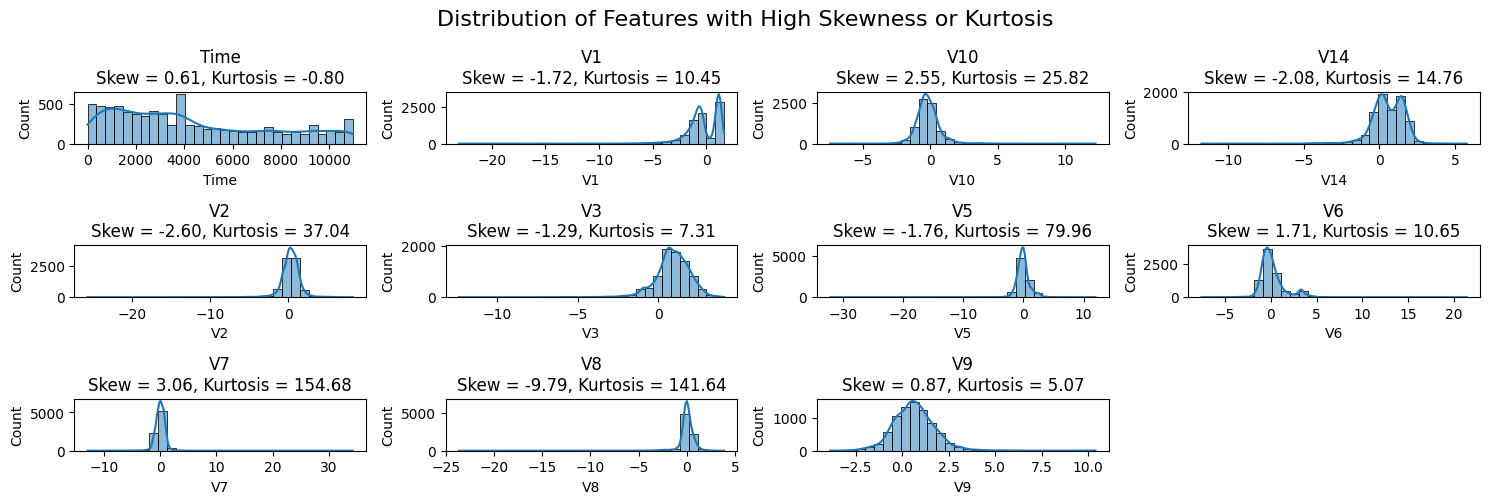

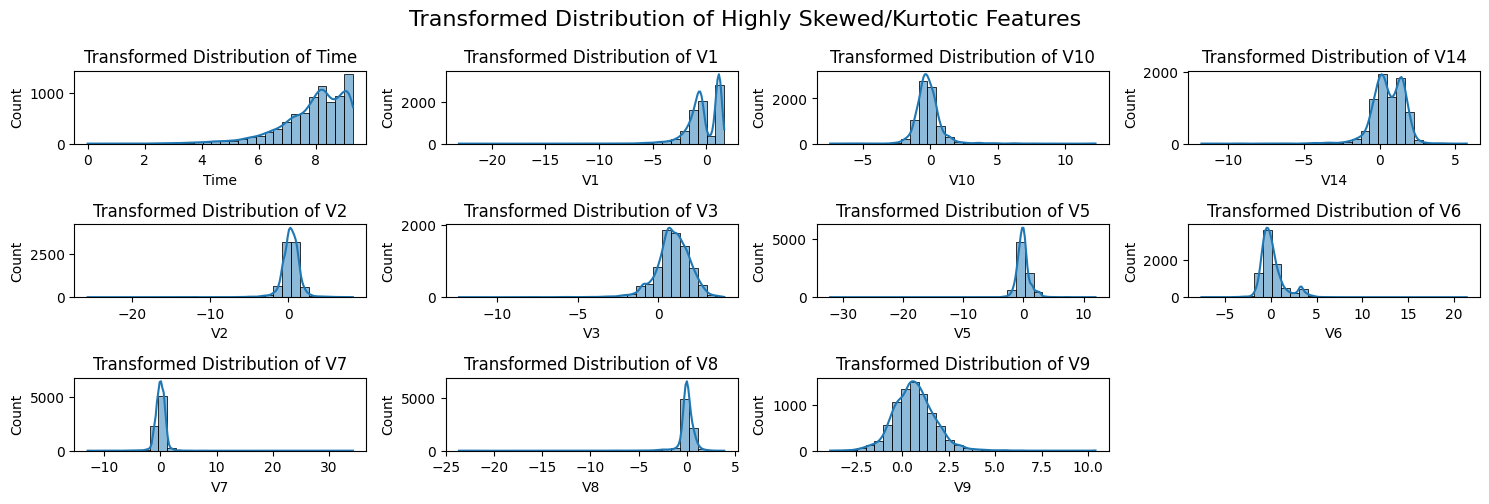

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/creditcard.csv")

# Calculate skewness and kurtosis for all numerical features
skewness = df.drop(columns=['Class']).apply(skew).sort_values(ascending=False)
kurt = df.drop(columns=['Class']).apply(kurtosis).sort_values(ascending=False)

# Visualize distribution, skewness, and kurtosis for highly skewed or high-kurtosis features
highly_skewed_or_kurt = skewness[skewness > 0.5].index.union(kurt[kurt > 3].index)

plt.figure(figsize=(15, 12))
for i, feature in enumerate(highly_skewed_or_kurt, 1):
    plt.subplot(8, 4, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"{feature}\nSkew = {skewness[feature]:.2f}, Kurtosis = {kurt[feature]:.2f}")
    plt.xlabel(feature)

plt.tight_layout()
plt.suptitle('Distribution of Features with High Skewness or Kurtosis', y=1.02, fontsize=16)
plt.show()

# Apply log transformation to highly skewed features (log doesn't apply to negative values)
df[highly_skewed_or_kurt] = df[highly_skewed_or_kurt].apply(lambda x: np.log1p(x) if x.min() >= 0 else x)

# Visualize transformed distributions
plt.figure(figsize=(15, 12))
for i, feature in enumerate(highly_skewed_or_kurt, 1):
    plt.subplot(8, 4, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Transformed Distribution of {feature}")
    plt.xlabel(feature)

plt.tight_layout()
plt.suptitle('Transformed Distribution of Highly Skewed/Kurtotic Features', y=1.02, fontsize=16)
plt.show()

<ipython-input-8-3cd673eceeb2>:8: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("creditcard.csv")


Skewness:
 V20    1.373205
V11    0.811405
V4     0.508171
V10    0.045989
V14   -3.158987
dtype: float64

Kurtosis:
 V20    82.203887
V14    34.477141
V10    28.895860
V11     5.272492
V4      2.760160
dtype: float64


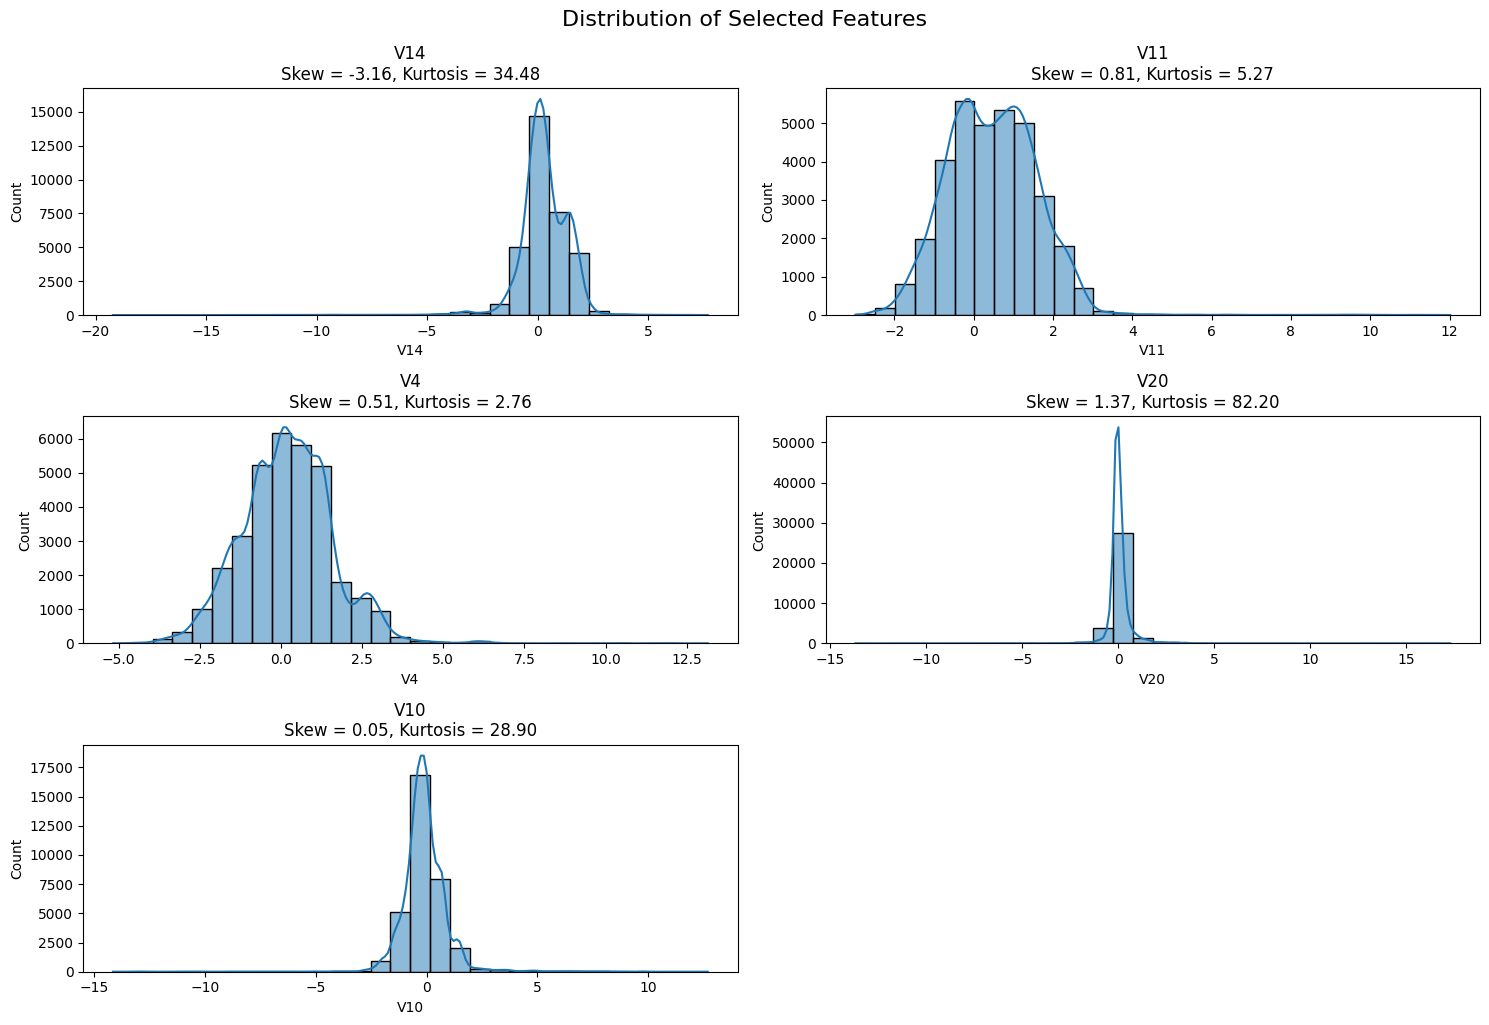

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Specify the five columns you want to analyze
columns_to_analyze = ['V14', 'V11', 'V4', 'V20', 'V10']  # Replace with your actual column names

# Calculate skewness and kurtosis for the specified columns
skewness = df[columns_to_analyze].apply(skew).sort_values(ascending=False)
kurt = df[columns_to_analyze].apply(kurtosis).sort_values(ascending=False)

# Print skewness and kurtosis
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurt)

# Visualize distribution, skewness, and kurtosis for the specified features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"{feature}\nSkew = {skewness[feature]:.2f}, Kurtosis = {kurt[feature]:.2f}")
    plt.xlabel(feature)

plt.tight_layout()
plt.suptitle('Distribution of Selected Features', y=1.02, fontsize=16)
plt.show()

<ipython-input-4-f5ad601e5704>:7: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('creditcard.csv')
<ipython-input-4-f5ad601e5704>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Skewness', data=result_df, palette='Blues_d')


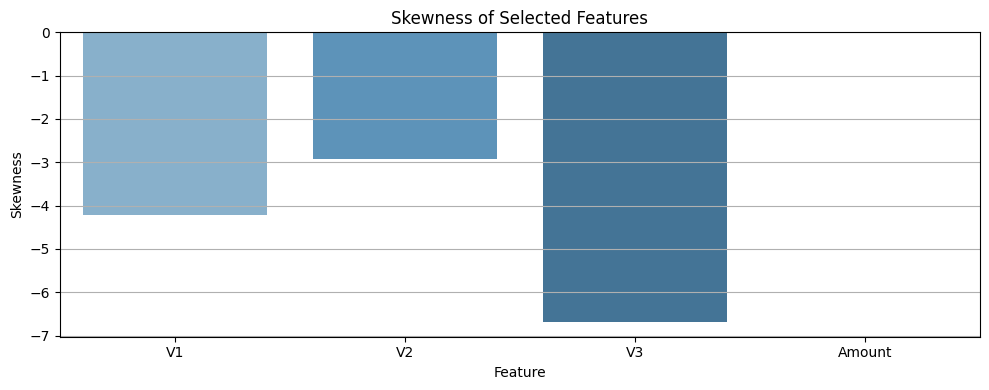

<ipython-input-4-f5ad601e5704>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Kurtosis', data=result_df, palette='Oranges_d')


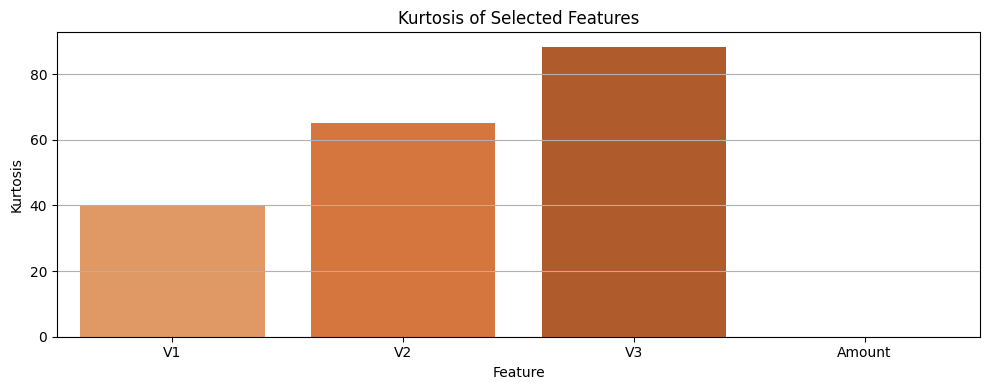

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load dataset
df = pd.read_csv('creditcard.csv')

# Select 4 columns
selected_cols = ['V1', 'V2', 'V3', 'Amount']
selected_data = df[selected_cols]

# Calculate skewness and kurtosis
skewness_vals = selected_data.apply(skew)
kurtosis_vals = selected_data.apply(kurtosis)

# Create result DataFrame
result_df = pd.DataFrame({
    'Feature': selected_cols,
    'Skewness': skewness_vals.values,
    'Kurtosis': kurtosis_vals.values
})

# Plot skewness
plt.figure(figsize=(10, 4))
sns.barplot(x='Feature', y='Skewness', data=result_df, palette='Blues_d')
plt.title('Skewness of Selected Features')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot kurtosis
plt.figure(figsize=(10, 4))
sns.barplot(x='Feature', y='Kurtosis', data=result_df, palette='Oranges_d')
plt.title('Kurtosis of Selected Features')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
